In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split
import math

In [2]:
data = pd.read_csv("hw2_data.csv")

In [3]:
data.head()

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,primary_strength,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,1079
1,Ivysaur,120,156,158,0.08,0.07,4.2,Grass,1643
2,Venusaur,160,198,200,0.04,0.05,1.7,Grass,2598
3,Charmander,78,128,108,0.16,0.10,25.3,Fire,962
4,Charmeleon,116,160,140,0.08,0.07,1.2,Fire,1568


In [9]:
correlation = {}
for i in range(1,7):
    correlation['combat_point vs '+data.keys()[i]] = data['combat_point'].corr(data.iloc[:,i], method = 'pearson')
correlation

{'combat_point vs stamina': 0.5828317032229261,
 'combat_point vs attack_value': 0.9075315401042738,
 'combat_point vs defense_value': 0.8262293053572938,
 'combat_point vs capture_rate': -0.7430078083529403,
 'combat_point vs flee_rate': -0.4070342114215966,
 'combat_point vs spawn_chance': -0.42132699465983603}

In [5]:
color = {1:"blue",  2: "red", 3: "green", 4: "cyan", 5: "magenta", 7: "yellow", 6: "black", 8: "white"}

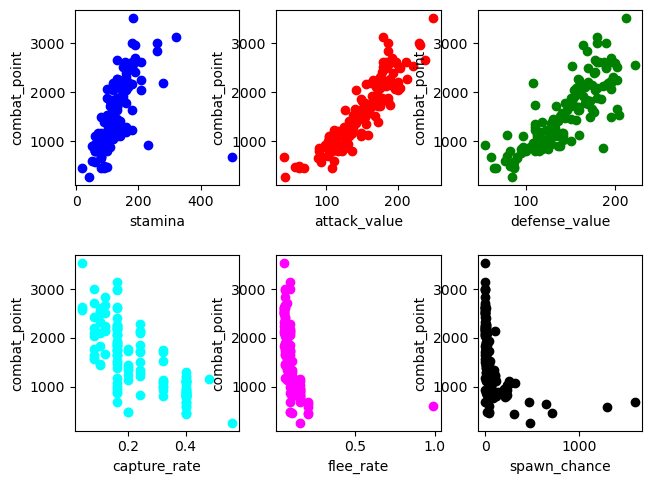

In [8]:
fig, ax = plt.subplots(3,2)
fig.tight_layout()
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.scatter(data.iloc[:,i], data.iloc[:,8], color = color[i])
    plt.xlabel(data.keys()[i])
    plt.ylabel(data.keys()[8])
plt.show()

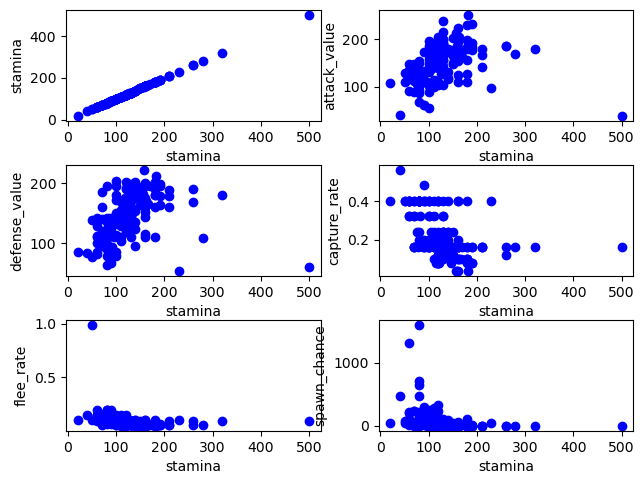

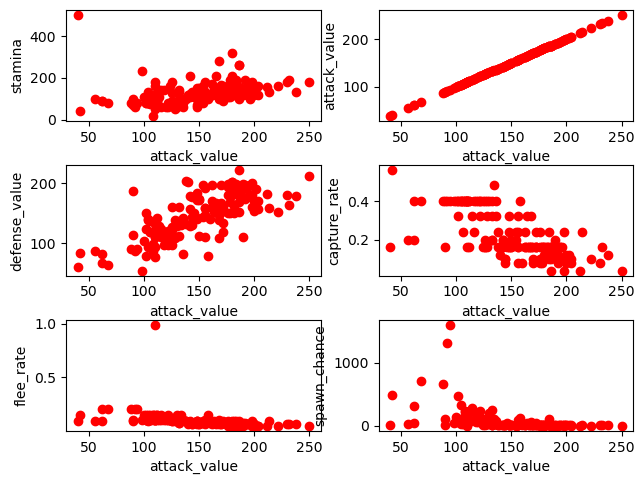

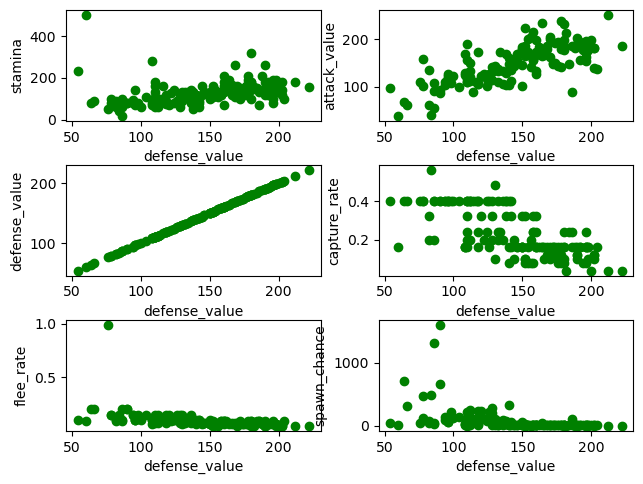

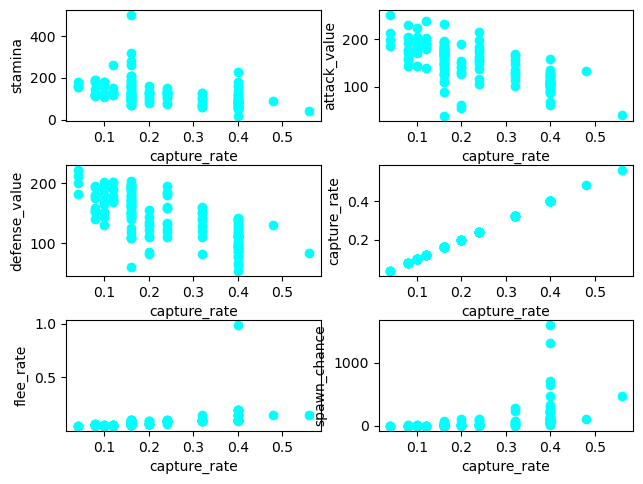

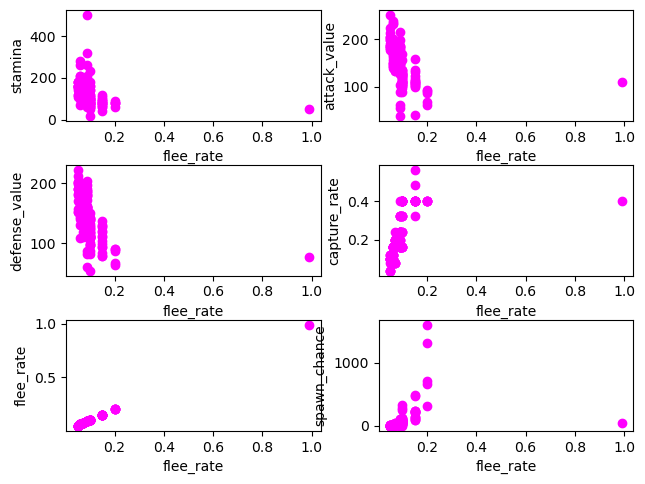

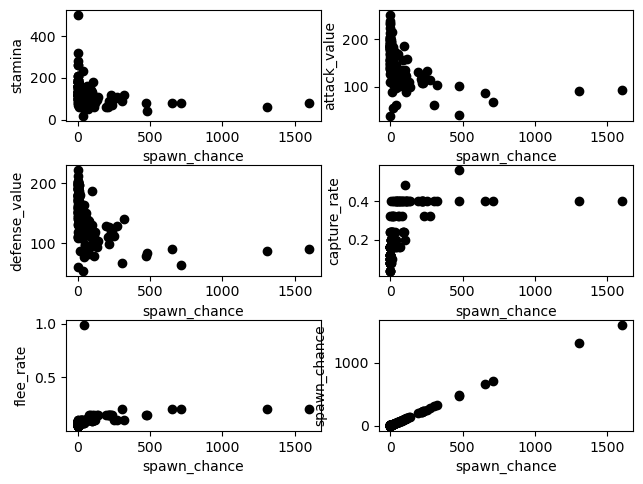

In [7]:
for i in range(1,7):
    k=1
    fig, ax = plt.subplots(3,2)
    fig.tight_layout()
    for j in range(1,7):
        k = k%3
        if k==0:
            k=3
        plt.subplot(3,2,j)
        plt.scatter(data.iloc[:,i], data.iloc[:,j], color = color[i])
        plt.xlabel(data.keys()[i])
        plt.ylabel(data.keys()[j])
        k += 1
    plt.show()

In [8]:
final_df = data.iloc[:, 1:7]
final_df.corr(method = 'pearson')

,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance
stamina,1.000000,0.302995,0.302663,-0.446850,-0.271048,-0.276420
attack_value,0.302995,1.000000,0.736777,-0.690573,-0.369064,-0.432648
defense_value,0.302663,0.736777,1.000000,-0.697266,-0.423860,-0.432499
capture_rate,-0.446850,-0.690573,-0.697266,1.000000,0.440512,0.472793
flee_rate,-0.271048,-0.369064,-0.423860,0.440512,1.000000,0.293222
spawn_chance,-0.276420,-0.432648,-0.432499,0.472793,0.293222,1.000000


In [9]:
df= pd.get_dummies(data['primary_strength'])
data = data.drop('primary_strength',axis=1)
data = data.join(df)
data.head()

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,combat_point,Bug,Dragon,...,Fire,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Water
0,Bulbasaur,90,126,126,0.16,0.10,69.0,1079,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Ivysaur,120,156,158,0.08,0.07,4.2,1643,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Venusaur,160,198,200,0.04,0.05,1.7,2598,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Charmander,78,128,108,0.16,0.10,25.3,962,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Charmeleon,116,160,140,0.08,0.07,1.2,1568,0,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
data['bias'] = 1

In [11]:
Y = data['combat_point']
Y.head()

0    1079
1    1643
2    2598
3     962
4    1568
Name: combat_point, dtype: int64

In [12]:
data= data.drop('combat_point', axis=1)
data.head()

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,Bug,Dragon,Electric,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Water,bias
0,Bulbasaur,90,126,126,0.16,0.10,69.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,Ivysaur,120,156,158,0.08,0.07,4.2,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,Venusaur,160,198,200,0.04,0.05,1.7,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,Charmander,78,128,108,0.16,0.10,25.3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Charmeleon,116,160,140,0.08,0.07,1.2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
X = data.iloc[:,1:]
X.head()

,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,Bug,Dragon,Electric,Fairy,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Water,bias
0,90,126,126,0.16,0.10,69.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,120,156,158,0.08,0.07,4.2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,160,198,200,0.04,0.05,1.7,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,78,128,108,0.16,0.10,25.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,116,160,140,0.08,0.07,1.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
main_cols = ['bias']+ X.columns.to_list()[:-1]
X = X[main_cols]
X.head()

,bias,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,Bug,Dragon,Electric,...,Fire,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Water
0,1,90,126,126,0.16,0.10,69.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,120,156,158,0.08,0.07,4.2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,160,198,200,0.04,0.05,1.7,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,78,128,108,0.16,0.10,25.3,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,116,160,140,0.08,0.07,1.2,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
#Store the split train and test data sets
kf = KFold(n_splits=5, shuffle=False)
X_ = X.to_numpy()
Y_ = Y.to_numpy()
X_train_set = []
X_test_set = []
Y_train_set = []
Y_test_set = []
split_data =  kf.split(X_)
for train_index, test_index in split_data:
    X_train_set.append(X_[train_index,:])
    Y_train_set.append(Y_[train_index].reshape(X_[train_index].shape[0],1))
    X_test_set.append(X_[test_index,:])
    Y_test_set.append(Y_[test_index].reshape(X_[test_index].shape[0],1))

In [16]:
perf =[]
for i in range (len(X_train_set)):
    X_train, X_test = X_train_set[i], X_test_set[i]
    Y_train, Y_test = Y_train_set[i], Y_test_set[i]
    X_train_transpose = X_train.T
    interm_matrix = np.matmul(X_train_transpose, X_train)
    #pseudo inverse
    inv_mat = np.linalg.pinv(interm_matrix)
    left_part =  np.matmul(X_train_transpose, Y_train)
    weights_star = np.matmul(inv_mat,left_part)
    perf.append(math.sqrt(1/(Y_test.shape[0])*sum((Y_test - np.matmul(X_test,weights_star))**2)))
perf

[238.0951048820434,
 98.24274381323976,
 143.9576211490135,
 276.4379767927157,
 170.3166248683674]

In [17]:
avg_error = sum(perf)/len(perf)
avg_error

185.41001430107593

In [18]:
perf_reg = []
reg_lambda = 0.83
for i in range (len(X_train_set)):
    X_train_reg, X_test_reg = X_train_set[i], X_test_set[i]
    Y_train_reg, Y_test_reg = Y_train_set[i], Y_test_set[i]
    X_train_transpose_reg = X_train_reg.T
    interm_matrix_reg = np.matmul(X_train_transpose_reg, X_train_reg) + reg_lambda*np.eye(X_train_transpose_reg.shape[0])
    #pseudo inverse
    inv_mat_reg = np.linalg.pinv(interm_matrix_reg)
    left_part_reg =  np.matmul(X_train_transpose_reg, Y_train_reg)
    weights_star_reg = np.matmul(inv_mat_reg,left_part_reg)
    perf_reg.append(math.sqrt(1/(Y_test_reg.shape[0])*sum((Y_test_reg - np.matmul(X_test_reg, weights_star_reg))**2)))
perf_reg

[119.05205769115156,
 92.8315321610521,
 98.84399696282203,
 296.1920162967134,
 186.96906233767103]

In [19]:
avg_error = sum(perf_reg)/len(perf_reg)
avg_error

158.77773308988202

In [20]:
#Assuming best correlation is only if correlation factor is greater than approx 0.5 and scatter plot shows a definite trend
#Thus only attack, defense and stamina rates matter
perf_reg = []
for i in range (len(X_train_set)):
    X_train_reg, X_test_reg = X_train_set[i][:,:4], X_test_set[i][:,:4]
    Y_train_reg, Y_test_reg = Y_train_set[i], Y_test_set[i]
    X_train_transpose_reg = X_train_reg.T
    interm_matrix_reg = np.matmul(X_train_transpose_reg, X_train_reg)
    #pseudo inverse
    inv_mat_reg = np.linalg.pinv(interm_matrix_reg)
    left_part_reg =  np.matmul(X_train_transpose_reg, Y_train_reg)
    weights_star_reg = np.matmul(inv_mat_reg,left_part_reg)
    perf_reg.append(math.sqrt(1/(Y_test_reg.shape[0])*sum((Y_test_reg - np.matmul(X_test_reg, weights_star_reg))**2)))
perf_reg

[151.17337580469237,
 77.35685697094283,
 91.08787186310748,
 285.7501305347148,
 176.1470577045314]

In [21]:
avg_error = sum(perf_reg)/len(perf_reg)
avg_error

156.3030585755978

In [22]:
#Assuming best correlation is only if correlation factor is greater than approx 0.75 and scatter plot shows a definite trend
#Thus only attack and defense rates matter
perf_reg = []
for i in range (len(X_train_set)):
    X_train_reg, X_test_reg = X_train_set[i][:,[0,2,3]], X_test_set[i][:,[0,2,3]]
    Y_train_reg, Y_test_reg = Y_train_set[i], Y_test_set[i]
    X_train_transpose_reg = X_train_reg.T
    interm_matrix_reg = np.matmul(X_train_transpose_reg, X_train_reg)
    #pseudo inverse
    inv_mat_reg = np.linalg.pinv(interm_matrix_reg)
    left_part_reg =  np.matmul(X_train_transpose_reg, Y_train_reg)
    weights_star_reg = np.matmul(inv_mat_reg,left_part_reg)
    perf_reg.append(math.sqrt(1/(Y_test_reg.shape[0])*sum((Y_test_reg - np.matmul(X_test_reg, weights_star_reg))**2)))
perf_reg

[160.34211936090574,
 216.32956433947814,
 201.75065066951126,
 287.46289183399915,
 333.2310056952472]

In [23]:
wit

239.82324637982828

In [24]:
#L1 normalization
perf_reg = []
reg_lambda = 0.875
for i in range (len(X_train_set)):
    X_train_reg, X_test_reg = X_train_set[i], X_test_set[i]
    Y_train_reg, Y_test_reg = Y_train_set[i], Y_test_set[i]
    X_train_transpose_reg = X_train_reg.T
    interm_matrix_reg = np.matmul(X_train_transpose_reg, X_train_reg) + reg_lambda*np.eye(X_train_transpose_reg.shape[0])
    #pseudo inverse
    inv_mat_reg = np.linalg.pinv(interm_matrix_reg)
    left_part_reg =  np.matmul(X_train_transpose_reg, Y_train_reg) - reg_lambda*np.ones([X_train_transpose_reg.shape[0],1])
    weights_star_reg = np.matmul(inv_mat_reg,left_part_reg)
    perf_reg.append(math.sqrt(1/(Y_test_reg.shape[0])*sum((Y_test_reg - np.matmul(X_test_reg, weights_star_reg))**2)))
perf_reg

[116.55539631008246,
 93.09574432026871,
 99.38511677357913,
 296.869847140259,
 187.8566260778647]

In [25]:
avg_error = sum(perf_reg)/len(perf_reg)
avg_error

158.7525461244108

In [26]:
#L1 normalization with selected features
perf_reg = []
reg_lambda = 0.15
for i in range (len(X_train_set)):
    X_train_reg, X_test_reg = X_train_set[i][:,:4], X_test_set[i][:,:4]
    Y_train_reg, Y_test_reg = Y_train_set[i], Y_test_set[i]
    X_train_transpose_reg = X_train_reg.T
    interm_matrix_reg = np.matmul(X_train_transpose_reg, X_train_reg) + reg_lambda*np.eye(X_train_transpose_reg.shape[0])
    #pseudo inverse
    inv_mat_reg = np.linalg.pinv(interm_matrix_reg)
    left_part_reg =  np.matmul(X_train_transpose_reg, Y_train_reg) - reg_lambda*np.ones([X_train_transpose_reg.shape[0],1])
    weights_star_reg = np.matmul(inv_mat_reg,left_part_reg)
    perf_reg.append(math.sqrt(1/(Y_test_reg.shape[0])*sum((Y_test_reg - np.matmul(X_test_reg, weights_star_reg))**2)))
perf_reg

[143.09371123071512,
 78.87283858978098,
 93.39450228682841,
 287.3850763805632,
 178.32011254736776]

In [27]:
avg_error = sum(perf_reg)/len(perf_reg)
avg_error

156.2132482070511

In [171]:
Y_d = Y>Y.describe()['mean']
Y_d = Y_d.astype(int).to_numpy()

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_,Y_d, test_size = 0.2)

In [174]:
logisticRegr = LogisticRegression(penalty = 'none')
logisticRegr.fit(X_train, Y_train)
score = logisticRegr.score(X_test, Y_test)
score

0.9666666666666667

In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=5, shuffle=True)
perf = []
X_train, X_test, Y_train, Y_test = train_test_split(X_,Y_d, test_size = 0.2)
logisticRegr = LogisticRegression(penalty = 'l2',solver = 'newton-cg', max_iter = 100000 )
parameters = {'C': [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0]}
gs = GridSearchCV(logisticRegr, param_grid=parameters, cv=kf, scoring="accuracy")
gs.fit(X_train, Y_train)
gs.cv_results_

{'mean_fit_time': array([0.00443969, 0.00799813, 0.00700207, 0.01020298, 0.01419749,
        0.02120743, 0.02479444, 0.03760138, 0.04559808, 0.06401496,
        0.07480135]),
 'std_fit_time': array([0.00100266, 0.00218878, 0.00109518, 0.00040269, 0.00132915,
        0.0039762 , 0.00444436, 0.00265859, 0.00736622, 0.01341792,
        0.01739358]),
 'mean_score_time': array([0.00060511, 0.        , 0.        , 0.00040002, 0.00040054,
        0.00020027, 0.        , 0.00040002, 0.00020013, 0.00020008,
        0.00020022]),
 'std_score_time': array([0.0004941 , 0.        , 0.        , 0.00048992, 0.00049057,
        0.00040054, 0.        , 0.00048992, 0.00040026, 0.00040016,
        0.00040045]),
 'param_C': masked_array(data=[1e-08, 1e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001,
                    0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),
 'p

In [177]:
fit_lambdas = [d['C'] for d in gs.cv_results_['params']]
fit_scores = gs.cv_results_['mean_test_score']

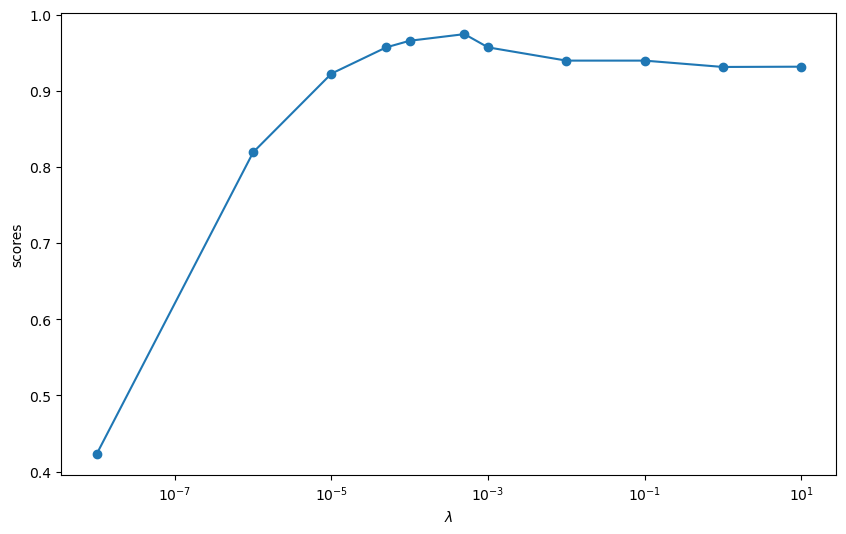

In [178]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');
plt.show()

In [179]:
index = np.where(fit_scores == max(fit_scores))
lamdas = fit_lambdas[index[0][0]]

In [180]:
logisticRegr = LogisticRegression(penalty = 'l2',solver = 'newton-cg', max_iter = 10000, C = lamdas)
logisticRegr.fit(X_train, Y_train)
score = logisticRegr.score(X_test, Y_test)
print(score)

0.9666666666666667
